<a href="https://colab.research.google.com/github/phdepaula/Credit-Card-Fraud-Detection/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP - Machine Learning & Analytics


**Student:** Pedro Henrique de Paula Alves

## Problem Definition


### Title

Credit Card Fraud Detection.

### Description

Due to the increasing use of credit cards on a daily basis, effective detection of fraudulent transactions is critical for card companies. This ensures that customers are not charged for unauthorized purchases, thus preserving financial security and consumer trust in credit card issuers.

### Dataset Information

The dataset contains credit card transactions conducted by European cardholders in September 2013. Spanning two days, it recorded a total of 284,807 transactions, among which 492 were identified as fraudulent. This dataset exhibits a notable imbalance, with fraudulent transactions representing only 0.172% of the total volume.

Comprising solely numerical input variables, the dataset results from a PCA transformation. Regrettably, due to confidentiality restrictions, original feature details and basic information remain undisclosed. Features V1 through V28 represent principal components derived from PCA, while 'Time' and 'Amount' remain unaltered. 'Time' signifies the time elapsed in seconds between each transaction and the first recorded transaction, while 'Amount' denotes the transaction value. The 'Amount' feature offers potential utility for example-dependent cost-sensitive learning.

Within this dataset, the 'Class' feature serves as the response variable, denoting a value of 1 for fraudulent transactions and 0 otherwise. This delineation facilitates the identification and analysis of fraudulent activities within the dataset.ble, assuming a value of 1 for fraudulent transactions and 0 otherwise.

---
## Data Preparation


### Imports

Here all necessary libs will be imported.

In [ ]:
# Configuration to not display warnings
import warnings

warnings.filterwarnings("ignore")

from typing import Any, List, Tuple

import matplotlib.pyplot as plt
import numpy as np

# Imports required
import pandas as pd
from sklearn.ensemble import (
    AdaBoostClassifier,
    BaggingClassifier,
    ExtraTreesClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    VotingClassifier,
)
from sklearn.feature_selection import RFE, SelectFromModel, SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import (
    GridSearchCV,
    StratifiedKFold,
    cross_val_score,
    train_test_split,
)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

### Dataset Loading

Here the dataset will be loaded.

As the dataset exceeded the storage limit supported by GitHub, the original dataset was split into two csv files and then joined into a single dataframe.

In [ ]:
# CSV file URLs
first_url = "https://raw.githubusercontent.com/phdepaula/Credit-Card-Fraud-Detection/main/dataset/credit_card_dataset_1.csv"
second_url = "https://raw.githubusercontent.com/phdepaula/Credit-Card-Fraud-Detection/main/dataset/credit_card_dataset_2.csv"

# Read CSV files and create DataFrames
dataset_1 = pd.read_csv(first_url, delimiter=',')
dataset_2 = pd.read_csv(second_url, delimiter=',')

# Concatenate the DataFrames
dataset = pd.concat([dataset_1, dataset_2], ignore_index=True)

# Show first rows of combined DataFrame
print(dataset.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

### Training and Test Set


Defining training and testing sets, reserving a percentage of 20% of the dataset for testing.

In [ ]:
array = dataset.values
X = array[:, 0:30]
y = array[:, 30]

test_size = 0.20
seed = 7

# Separation into training and testing bases (holdout)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=test_size,
    shuffle=True,
    random_state=seed,
    stratify=y
)

### General Functions

The general purpose functions used throughout the project will be attached here.

In [ ]:
def add_element_to_list(models: List, element: Any) -> List:
    models.append(element)

def plot_graph(suptitle: str, results: List, names: List) -> None:
    fig = plt.figure(figsize=(15,10))
    fig.suptitle(suptitle)
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()

### Cross Validation

In order to obtain a more realistic performance estimate, cross-validation will be carried out.

#### Algorithm Test

The machine learning algorithms adopted at this stage were KNN, Classification Tree, Naive Bayes, SVM and Logistic Regression.

In [ ]:
# Defining constants

# Setting cross-validation parameters and partitions
scoring = 'accuracy'
number_partitions = 10
seed = 7
k_fold = StratifiedKFold(n_splits=number_partitions, shuffle=True, random_state=seed)

# Setting a global seed
np.random.seed(7)

LR: 0.998969 (0.000255)
KNN: 0.998363 (0.000068)
CART: 0.999122 (0.000146)
NB: 0.992618 (0.000310)
SVM: 0.998271 (0.000021)


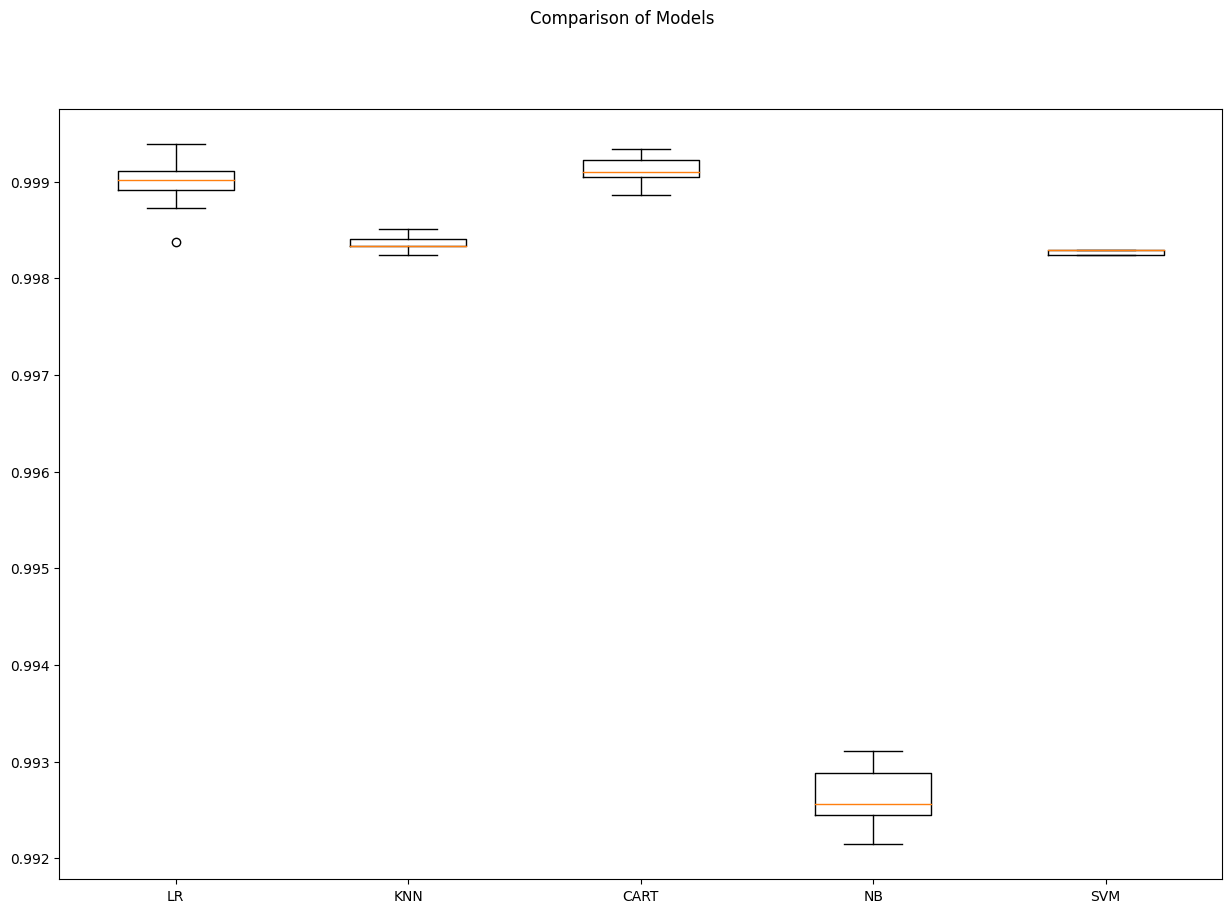

In [ ]:
# Templates Generation

# Creating models of templates
models = [
    ('LR', LogisticRegression(max_iter=200)),
    ('KNN', KNeighborsClassifier()),
    ('CART', DecisionTreeClassifier()),
    ('NB', GaussianNB()),
    ('SVM', SVC())
]

# Generating results with Cross Validation
results = []
names = []

for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=k_fold, scoring=scoring)
    add_element_to_list(results, cv_results)
    add_element_to_list(names, name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Generating Comparison Chart
plot_graph('Comparison of Models', results, names)

### Data Transformation

Aiming to identify better results data transformation will be perfomed.

#### Standardized Data and Normalized Data

In [ ]:
# Setting cross-validation parameters and partitions
scoring = 'accuracy'
number_partitions = 10
seed = 7
k_fold = StratifiedKFold(n_splits=number_partitions, shuffle=True, random_state=seed)

# Setting a global seed
np.random.seed(7)

# Transformations that will be used
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

LR-orig: 0.998969 (0.000255)
LR-std: 0.999175 (0.000209)
LR-nml: 0.999034 (0.000226)
KNN-orig: 0.998363 (0.000068)
KNN-std: 0.999473 (0.000169)
KNN-nml: 0.999482 (0.000158)
CART-orig: 0.999122 (0.000146)
CART-std: 0.999074 (0.000137)
CART-nml: 0.999113 (0.000114)
NB-orig: 0.992618 (0.000310)
NB-std: 0.977809 (0.001215)
NB-nml: 0.977809 (0.001215)
SVM-orig: 0.998271 (0.000021)
SVM-std: 0.999359 (0.000176)
SVM-nml: 0.999364 (0.000145)


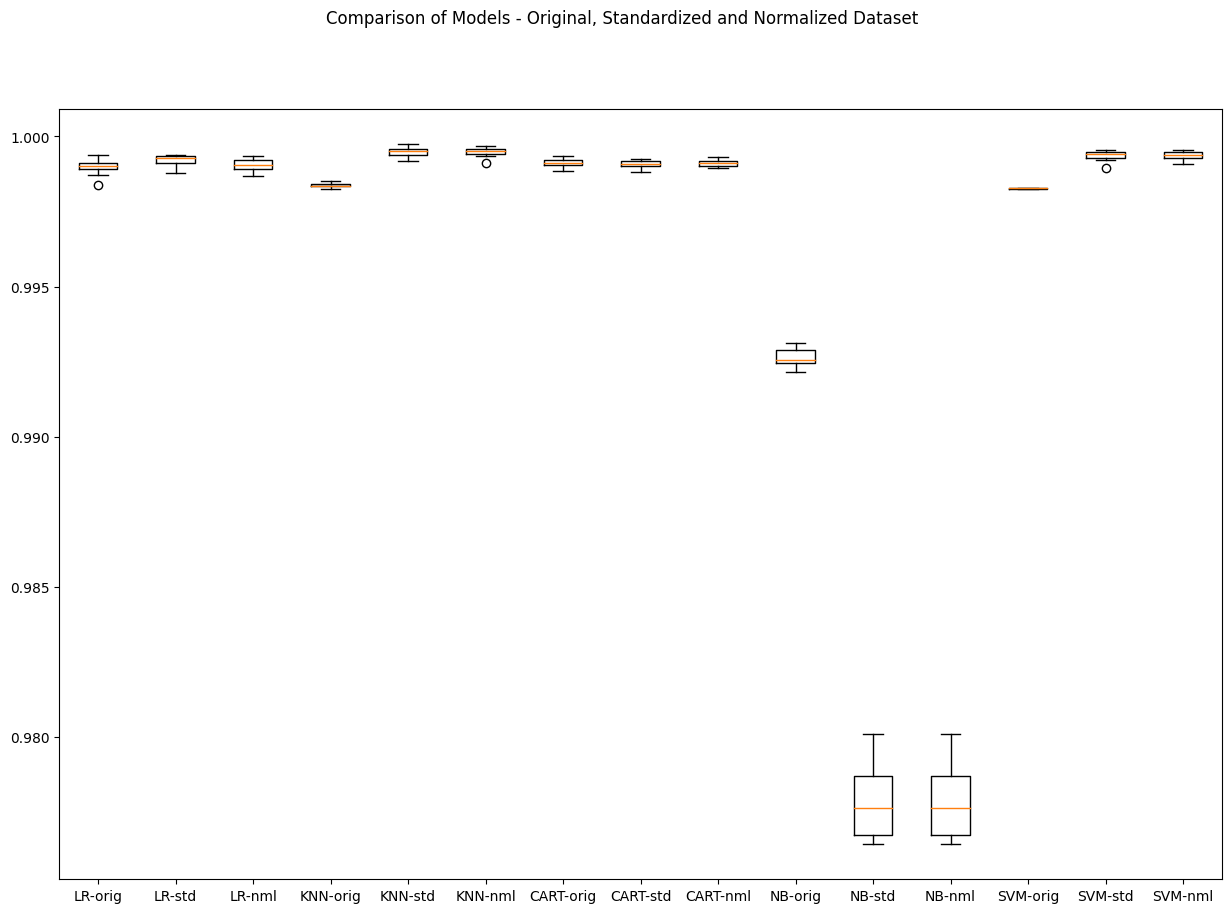

In [ ]:
# Creating models of templates
models = [
    ('LR', LogisticRegression(max_iter=200)),
    ('KNN', KNeighborsClassifier()),
    ('CART', DecisionTreeClassifier()),
    ('NB', GaussianNB()),
    ('SVM', SVC())
]

# Generating Pipelines
pipelines = []

for name, model in models:
    # Original Dataset
    original = (f"{name}-orig", Pipeline([(name, model)]))
    add_element_to_list(pipelines, original)

    # Standardized Dataset
    standard = (f"{name}-std", Pipeline([(standard_scaler[0], standard_scaler[1]), (name, model)]))
    add_element_to_list(pipelines, standard)

    # Normalized Dataset
    normalized = (f"{name}-nml", Pipeline([(min_max_scaler[0], min_max_scaler[1]), (name, model)]))
    add_element_to_list(pipelines, normalized)

results = []
names = []

for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=k_fold, scoring=scoring)
    add_element_to_list(results, cv_results)
    add_element_to_list(names, name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Generating Comparison Chart
plot_graph('Comparison of Models - Original, Standardized and Normalized Dataset', results, names)

### Feature Selection

Aiming to identify the parameters that are most relevant for the analyses, feature selection was carried out.

Feature selection performed only on data reserved for training

#### Univariate Selection

In [ ]:
# Attribute selection with SelectKBest
best_var = SelectKBest(score_func=f_classif, k=4)

# Execute the scoring function on (X_train, y_train) and get the selected attributes
fit = best_var.fit(X_train, y_train)

# Reduces X_train for selected attributes
features = fit.transform(X_train)

# Printing Results
number_original_atributes = X_train.shape[1]
print(f"Number of original attributes: {number_original_atributes}")

name_original_atributes = dataset.columns.tolist()[:30]
print(f"Name of original attributes: {name_original_atributes}")

number_reduced_atributes = features.shape[1]
print(f"\nNumber of reduced attributes: {number_reduced_atributes}")

name_reduced_atributes = best_var.get_feature_names_out(input_features=dataset.columns[0:30])
print(f"Name of reduced attributes: {name_reduced_atributes}")

atributes_scores = dict(zip(dataset.columns[:30], [round(score, 3) for score in fit.scores_]))
print(f"\nScore of attributes:")

for column, score in atributes_scores.items():
    print(f'- {column}: {score}')

Number of original attributes: 30
Name of original attributes: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

Number of reduced attributes: 4
Name of reduced attributes: ['V10' 'V12' 'V14' 'V17']

Score of attributes:
- Time: 36.583
- V1: 2398.961
- V2: 1849.202
- V3: 8912.438
- V4: 4160.704
- V5: 2012.629
- V6: 459.08
- V7: 8061.689
- V8: 130.191
- V9: 2242.958
- V10: 11247.658
- V11: 5697.245
- V12: 16611.625
- V13: 3.83
- V14: 23448.098
- V15: 2.728
- V16: 9100.689
- V17: 27200.679
- V18: 2842.399
- V19: 275.232
- V20: 88.504
- V21: 337.228
- V22: 0.008
- V23: 6.221
- V24: 15.995
- V25: 2.279
- V26: 5.166
- V27: 84.16
- V28: 11.1
- Amount: 10.229


LR: 0.999135 (0.000194)
KNN: 0.999539 (0.000132)
CART: 0.999135 (0.000157)
NB: 0.990849 (0.000565)
SVM: 0.999486 (0.000143)


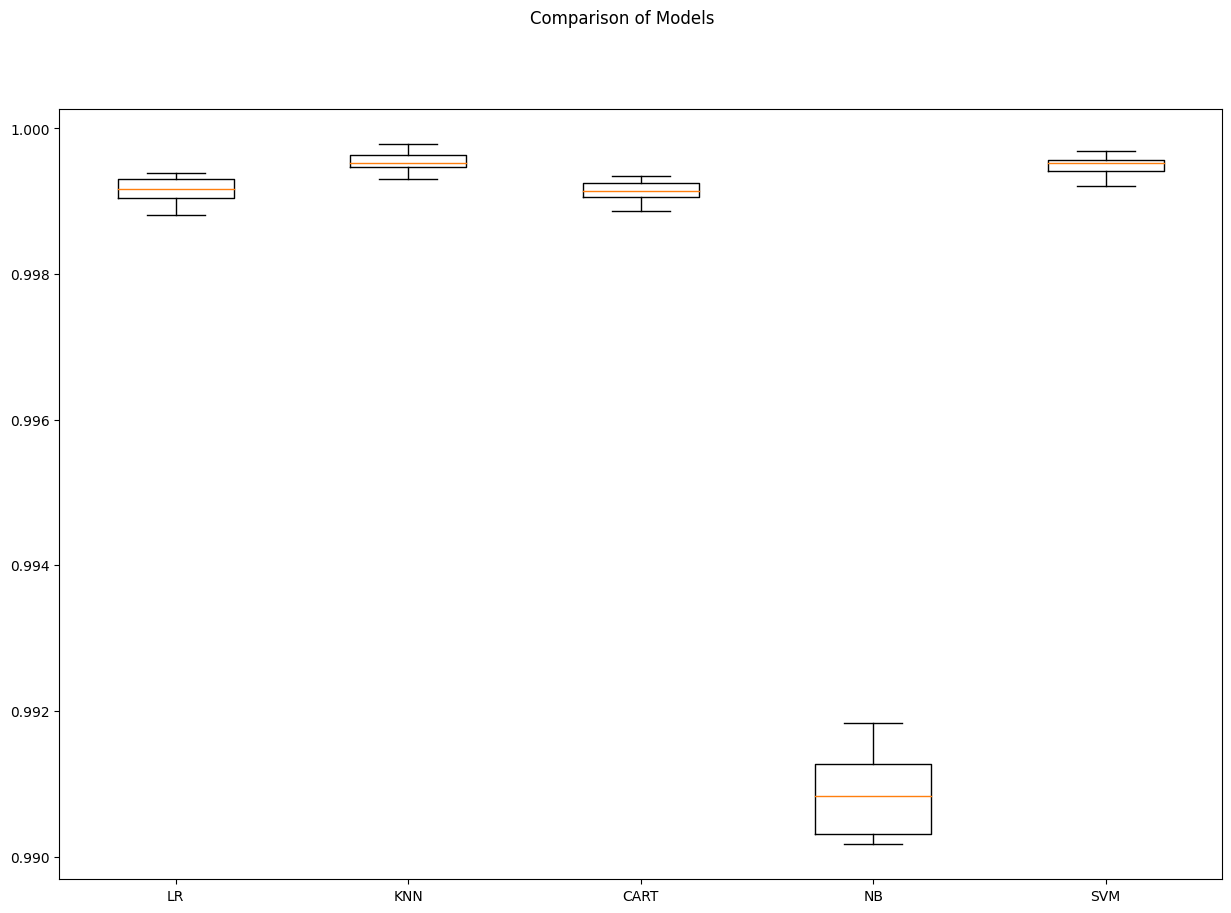

In [ ]:
# Defining constants

# Setting cross-validation parameters and partitions
scoring = 'accuracy'
number_partitions = 10
seed = 7
k_fold = StratifiedKFold(n_splits=number_partitions, shuffle=True, random_state=seed)

# Setting a global seed
np.random.seed(7)

# Templates Generation

# Creating models of templates
models = [
    ('LR', LogisticRegression(max_iter=200)),
    ('KNN', KNeighborsClassifier()),
    ('CART', DecisionTreeClassifier()),
    ('NB', GaussianNB()),
    ('SVM', SVC())
]

# Generating results with Cross Validation and Feature Selection
results = []
names = []

for name, model in models:
    cv_results = cross_val_score(model, features, y_train, cv=k_fold, scoring=scoring)
    add_element_to_list(results, cv_results)
    add_element_to_list(names, name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Generating Comparison Chart
plot_graph('Comparison of Models', results, names)

#### Recursive Attribute Elimination

In [ ]:
# Model creation
model = LogisticRegression(max_iter=200)

# Recursive Attribute Elimination
rfe = RFE(model, n_features_to_select=4)
fit = rfe.fit(X_train, y_train)

# Reduces X_train for selected attributes
features = fit.transform(X_train)

# Printing Results
number_original_atributes = X_train.shape[1]
print(f"Number of original attributes: {number_original_atributes}")

name_original_atributes = dataset.columns.tolist()[:30]
print(f"Name of original attributes: {name_original_atributes}")

number_reduced_atributes = fit.n_features_
print(f"\nNumber of reduced attributes: {number_reduced_atributes}")

name_reduced_atributes = fit.get_feature_names_out(input_features=dataset.columns[0:30])
print(f"Name of reduced attributes: {name_reduced_atributes}")

print(f"\nScore of attributes:")
atributes_support = fit.support_
atributes_ranking = fit.ranking_

for i in range(len(atributes_support)):
  result = atributes_support[i]
  ranking = atributes_ranking[i]

  print(f'- {name_original_atributes[i]}:')
  print(f'    Result: {result}')
  print(f'    Ranking: {ranking}')

Number of original attributes: 30
Name of original attributes: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

Number of reduced attributes: 4
Name of reduced attributes: ['V4' 'V14' 'V21' 'V22']

Score of attributes:
- Time:
    Result: False
    Ranking: 27
- V1:
    Result: False
    Ranking: 20
- V2:
    Result: False
    Ranking: 22
- V3:
    Result: False
    Ranking: 19
- V4:
    Result: True
    Ranking: 1
- V5:
    Result: False
    Ranking: 12
- V6:
    Result: False
    Ranking: 16
- V7:
    Result: False
    Ranking: 24
- V8:
    Result: False
    Ranking: 5
- V9:
    Result: False
    Ranking: 7
- V10:
    Result: False
    Ranking: 2
- V11:
    Result: False
    Ranking: 13
- V12:
    Result: False
    Ranking: 23
- V13:
    Result: False
    Ranking: 3
- V14:
    Result: True
    Ranking: 1
- V15:
    Result: False

LR: 0.998920 (0.000230)
KNN: 0.999346 (0.000184)
CART: 0.998977 (0.000238)
NB: 0.989826 (0.000565)
SVM: 0.999307 (0.000181)


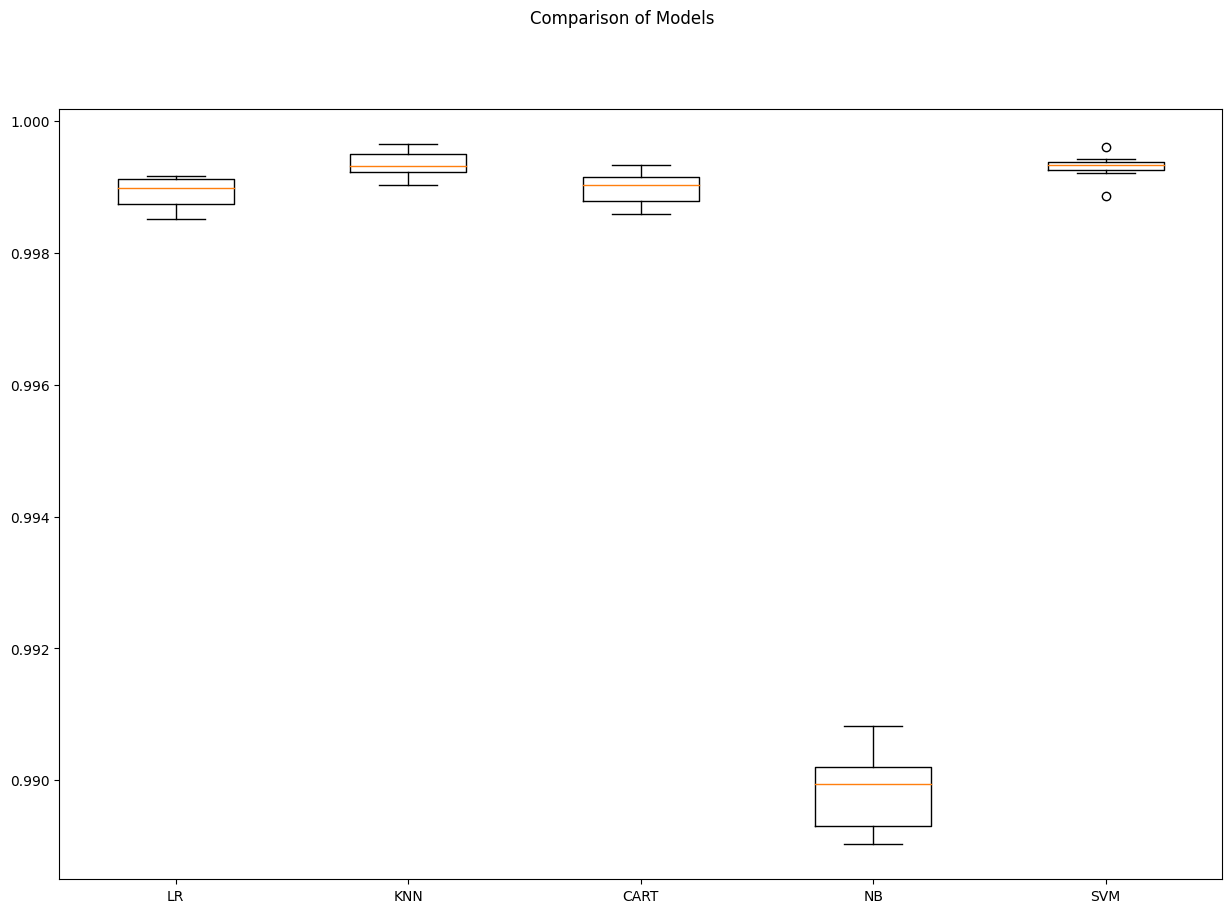

In [ ]:
# Defining constants

# Setting cross-validation parameters and partitions
scoring = 'accuracy'
number_partitions = 10
seed = 7
k_fold = StratifiedKFold(n_splits=number_partitions, shuffle=True, random_state=seed)

# Setting a global seed
np.random.seed(7)

# Templates Generation

# Creating models of templates
models = [
    ('LR', LogisticRegression(max_iter=200)),
    ('KNN', KNeighborsClassifier()),
    ('CART', DecisionTreeClassifier()),
    ('NB', GaussianNB()),
    ('SVM', SVC())
]

# Generating results with Cross Validation and Feature Selection
results = []
names = []

for name, model in models:
    cv_results = cross_val_score(model, features, y_train, cv=k_fold, scoring=scoring)
    add_element_to_list(results, cv_results)
    add_element_to_list(names, name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Generating Comparison Chart
plot_graph('Comparison of Models', results, names)

#### Importance of Attributes

In [ ]:
# Creation of the model for attribute selection
model = ExtraTreesClassifier(n_estimators=100)
model.fit(X_train, y_train)

# Printing Results
number_original_atributes = X_train.shape[1]
print(f"Number of original attributes: {number_original_atributes}")

name_original_atributes = dataset.columns.tolist()[:30]
print(f"Name of original attributes: {name_original_atributes}")

number_reduced_atributes = 4
print(f"\nNumber of reduced attributes: {number_reduced_atributes}")

model_importance = model.feature_importances_
ordered_model_importance = sorted(model_importance, reverse = True)[0:number_reduced_atributes]
name_reduced_atributes = [
    name_original_atributes[i] for i in range(len(model_importance))
    if model_importance[i] in ordered_model_importance
]
print(f"Name of reduced attributes: {name_reduced_atributes}")

print(f"\nScore of attributes:")

for i in range(len(model_importance)):
  name = name_original_atributes[i]
  importance = round(model_importance[i], 3)

  print(f'- {name}: {importance}')

# Create a selector based on the importance of attributes
selector = SelectFromModel(model, threshold=-np.inf, max_features=number_reduced_atributes)

# Fit the selector to the training data to select attributes
selector.fit(X_train, y_train)

# Reduces X_train for selected attributes
features = selector.transform(X_train)

Number of original attributes: 30
Name of original attributes: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

Number of reduced attributes: 4
Name of reduced attributes: ['V11', 'V12', 'V14', 'V17']

Score of attributes:
- Time: 0.016
- V1: 0.014
- V2: 0.014
- V3: 0.034
- V4: 0.036
- V5: 0.013
- V6: 0.013
- V7: 0.026
- V8: 0.016
- V9: 0.032
- V10: 0.073
- V11: 0.09
- V12: 0.081
- V13: 0.013
- V14: 0.116
- V15: 0.012
- V16: 0.068
- V17: 0.148
- V18: 0.041
- V19: 0.015
- V20: 0.015
- V21: 0.016
- V22: 0.013
- V23: 0.01
- V24: 0.012
- V25: 0.011
- V26: 0.015
- V27: 0.013
- V28: 0.012
- Amount: 0.012


LR: 0.999109 (0.000206)
KNN: 0.999451 (0.000156)
CART: 0.999140 (0.000186)
NB: 0.993531 (0.000508)
SVM: 0.999500 (0.000140)


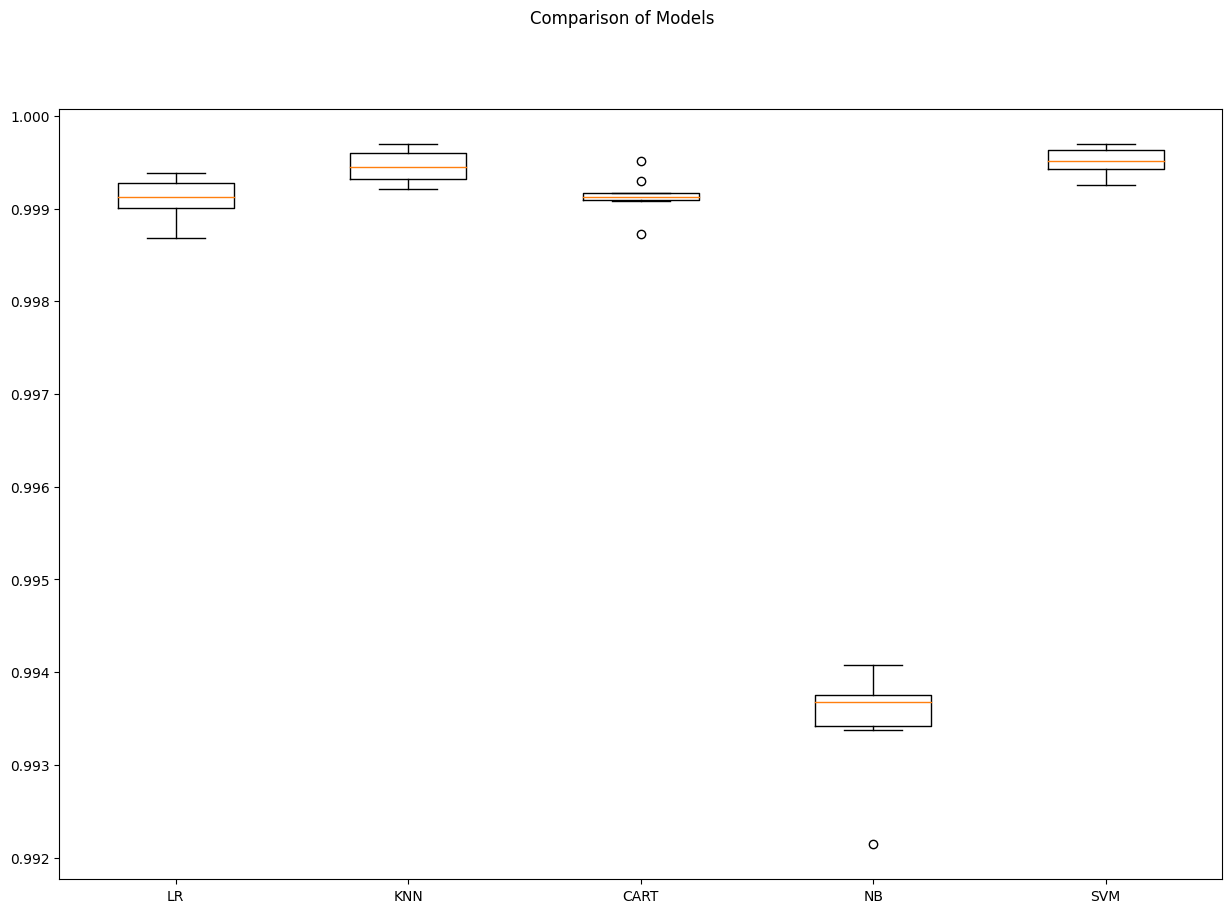

In [ ]:
# Defining constants

# Setting cross-validation parameters and partitions
scoring = 'accuracy'
number_partitions = 10
seed = 7
k_fold = StratifiedKFold(n_splits=number_partitions, shuffle=True, random_state=seed)

# Setting a global seed
np.random.seed(7)

# Templates Generation

# Creating models of templates
models = [
    ('LR', LogisticRegression(max_iter=200)),
    ('KNN', KNeighborsClassifier()),
    ('CART', DecisionTreeClassifier()),
    ('NB', GaussianNB()),
    ('SVM', SVC())
]

# Generating results with Cross Validation and Feature Selection
results = []
names = []

for name, model in models:
    cv_results = cross_val_score(model, features, y_train, cv=k_fold, scoring=scoring)
    add_element_to_list(results, cv_results)
    add_element_to_list(names, name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Generating Comparison Chart
plot_graph('Comparison of Models', results, names)

---
## Modeling and Training

### Selected Algorithms

Based on the analyzes carried out in the Data Preparation stage, the most suitable algorithms for solving the problem will be analyzed here.

In the Data Preparation stage, five classification algorithms were tested:

- Logistic Regression - LR
- K-Nearest Neighbors - KNN
- Classification Tree - CART
- Naive Bayes - NB
- Support Vector Machine - SVM


Furthermore, aiming to achieve better results compared to the aforementioned algorithms, all of them were tested under different scenarios, which were:

- Original Dataset
- Transformed Dataset
- Dataset with Feature Selection

In the table below, the top five results obtained by the study are attached:

| Section             | Category                 | Algorithm | Average Accuracy | Standard Deviation |
|---------------------|--------------------------|-----------|------------------|--------------------|
| Feature Selection   | Univariate Selection     | KNN       | 99.9539%         | 0.0001             |
| Feature Selection   | Univariate Selection     | SVM       | 99.9486%         | 0.0001            |
| Data Transformation | Normalized               | KNN       | 99.9482%         | 0.0002             |
| Data Transformation | Standardized             | KNN       | 99.9473%         | 0.0002             |
| Feature Selection   | Importance of Attributes | KNN       | 99.9473%         | 0.0001             |

Therefore, we can conclude that the algorithms that showed the best results were KNN and SVM. Additionally, the scenarios that exhibited the best performance were those involving feature selection and data transformation.

### Training Performance

At this stage, it will be assessed whether the model was properly trained and whether underfitting was detected.

To ensure that the algorithms were properly trained, it was decided to evaluate the models' performance on various subsets of the original data using cross-validation. This strategy aimed to obtain an average estimate of the results at each stage of the process.

As the average accuracy resulting from the 10 partitions defined as standard for model evaluation exceeded 99%, a satisfactory adaptation of the classifiers to the training sets was observed. Therefore, it is possible to conclude that this result indicates the absence of underfitting, demonstrating that the models were able to adequately adjust to the training data.

___
## Results Assessment

### Assessment Metrics

At this stage, a discussion will be made about which metrics will be used to evaluate the model.

The evaluation metric adopted for the model was accuracy, which represents the classifier's accuracy rate.

It is defined by the following equation:

- Acc(h) = 1 - Err(h)

Where:
- Err(h) is error rate.

So that:

- The closer the result is to 1, it means that the error rate was lower.

### Training and Test Results

At this stage, training will be carried out with the models that presented the five best results and tests will be carried out with the test base.

#### KNN with Feature Selection

##### Univariate Selection

In [ ]:
# Attribute selection with SelectKBest
best_var = SelectKBest(score_func=f_classif, k=4)

# Execute the scoring function on (X_train, y_train) and get the selected attributes
fit = best_var.fit(X_train, y_train)

# Reduces X_train and X_test for selected attributes
x_train_featured = fit.transform(X_train)
x_test_featured = fit.transform(X_test)

# Initialize KNeighborsClassifier
knn_classifier = KNeighborsClassifier()

# Training the classifier
knn_classifier.fit(x_train_featured, y_train)

# Predict labels for test data
y_pred = knn_classifier.predict(x_test_featured)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

Accuracy: 0.9995259997893332
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56864
         1.0       0.95      0.77      0.85        98

    accuracy                           1.00     56962
   macro avg       0.97      0.88      0.92     56962
weighted avg       1.00      1.00      1.00     56962



##### Importance of Attributes

In [ ]:
# Initialize ExtraTreesClassifier
et_classifier = ExtraTreesClassifier(n_estimators=100)

# Fit ExtraTreesClassifier to training data
et_classifier.fit(X_train, y_train)

# Get feature importances
feature_importances = et_classifier.feature_importances_

# Sort feature importances in descending order
sorted_indices = feature_importances.argsort()[::-1]

# Select top k features (e.g., top 4)
selected_indices = sorted_indices[:4]

# Reduce X_train and X_test to selected features
x_train_featured = X_train[:, selected_indices]
x_test_featured = X_test[:, selected_indices]

# Training the classifier
et_classifier.fit(x_train_featured, y_train)

# Predict labels for test data
y_pred = et_classifier.predict(x_test_featured)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

Accuracy: 0.9995435553526912
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56864
         1.0       0.95      0.78      0.85        98

    accuracy                           1.00     56962
   macro avg       0.97      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962



#### SVM with Feature Selection

##### Univariate Selection

In [ ]:
# Attribute selection with SelectKBest
best_var = SelectKBest(score_func=f_classif, k=4)

# Execute the scoring function on (X_train, y_train) and get the selected attributes
fit = best_var.fit(X_train, y_train)

# Reduces X_train and X_test for selected attributes
x_train_featured = fit.transform(X_train)
x_test_featured = fit.transform(X_test)

# Initialize SVC
svc_classifier = SVC()

# Training the classifier
svc_classifier.fit(x_train_featured, y_train)

# Predict labels for test data
y_pred = svc_classifier.predict(x_test_featured)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

Accuracy: 0.9994557775359011
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56864
         1.0       0.96      0.71      0.82        98

    accuracy                           1.00     56962
   macro avg       0.98      0.86      0.91     56962
weighted avg       1.00      1.00      1.00     56962



#### KNN with Data Transformation

##### Dataset Normalized

In [ ]:
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),  # Apply MinMaxScaler
    ('classification', KNeighborsClassifier())  # KNN Classifier
])

# Train the pipeline
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

Accuracy: 0.9994733330992591
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56864
         1.0       0.94      0.74      0.83        98

    accuracy                           1.00     56962
   macro avg       0.97      0.87      0.91     56962
weighted avg       1.00      1.00      1.00     56962



##### Dataset Standardized

In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Apply StandardScaler
    ('classification', KNeighborsClassifier())  # KNN Classifier
])

# Train the pipeline
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

Accuracy: 0.9995786664794073
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56864
         1.0       0.96      0.79      0.87        98

    accuracy                           1.00     56962
   macro avg       0.98      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962



### Final Evaluation

At this stage, the final result obtained will be discussed, analyzing the presence of overfitting and the quality of the solution found.

In the previous step, training and test results, we evaluated the performance of the algorithms with the test set for each of the top five algorithms identified.

To conduct the analysis, the following criteria were taken into consideration:
- Precision: It is the proportion of instances classified as positive that are truly positive.
- Recall: It is the proportion of positive instances that were correctly identified by the model.
- F1-score: It is the harmonic mean between precision and recall.
- Support: It is the number of instances of each class in the dataset.
- Accuracy: It is the proportion of all instances correctly classified.
- Macro avg and weighted avg: These are averages of precision, recall, and f1-score metrics. Macro avg calculates the averages without considering the class distribution, while weighted avg takes into account the class distribution, meaning classes with more instances have more weight in the average.

Based on the results provided, the KNN algorithm with the standardized dataset presented the best performance, as it achieved the highest accuracy value (99.96%) and also the highest precision, recall and F1 score for the minority class (class 1.0).

Carrying out a more detailed analysis of each of these parameters, we can infer that:

- Accuracy: The accuracy of approximately 99.96% indicates that the model correctly classified almost all instances in the test dataset, as it indicates the proportion of correctly classified instances out of the total number of instances.

- Precision (for class 1.0): The precision of 96% means that, among all instances predicted as class 1.0, 96% of them actually belonged to class 1.0, as it indicates the proportion of true positive instances among all instances predicted as positive.

- Recall (for class 1.0): The recall of 79% indicates that the model correctly identified 79% of all actual class 1.0 instances, as it indicates the proportion of true positive instances among all actual positive instances.

- F1-score (for class 1.0): The F1-score of 87% is the harmonic mean between precision and recall, providing a balance between precision and recall. A higher F1-score indicates a better balance between precision and recall.


Therefore, we can conclude that the algorithm's performance was highly satisfactory, and there was no overfitting, as the results from the test set were consistent with those from the training set.